<a href="https://colab.research.google.com/github/olinyoder2534/Misc/blob/main/EnergyConsumptionTS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [104]:
df = pd.read_csv('/content/PJME_hourly.csv')

In [105]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [106]:
df.shape

(145366, 2)

In [107]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [108]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [109]:
energy = df['PJME_MW']

In [131]:
energy.head()

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
Name: PJME_MW, dtype: float64

In [110]:
def df_to_X_y(df, window_size = 5):
  df_as_numpy = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_numpy) - window_size):
    row = [[a] for a in df_as_numpy[i:i+5]]
    X.append(df_as_numpy[i:i+window_size])
    label = df_as_numpy[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [111]:
WINDOW_SIZE = 5
X, y = df_to_X_y(energy, WINDOW_SIZE)

In [112]:
X.shape, y.shape

((145361, 5), (145361,))

In [113]:
X_train, y_train = X[:100000], y[:100000]
X_val, y_val = X[100000:125000], y[100000:125000]
X_test, y_test = X[125000:], y[125000:]

In [114]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((100000, 5), (100000,), (25000, 5), (25000,), (20361, 5), (20361,))

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [136]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(32))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

cp = ModelCheckpoint('model/', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[cp, early_stopping])

test_predictions = model.predict(X_test).flatten()

Epoch 1/10
3125/3125 [==============================] - 38s 11ms/step - loss: 1072564288.0000 - root_mean_squared_error: 32750.0273 - val_loss: 988702720.0000 - val_root_mean_squared_error: 31443.6445
Epoch 2/10
3125/3125 [==============================] - 32s 10ms/step - loss: 999228160.0000 - root_mean_squared_error: 31610.5703 - val_loss: 894156800.0000 - val_root_mean_squared_error: 29902.4551
Epoch 3/10
3125/3125 [==============================] - 31s 10ms/step - loss: 884107776.0000 - root_mean_squared_error: 29733.9492 - val_loss: 767108032.0000 - val_root_mean_squared_error: 27696.7148
Epoch 4/10
3125/3125 [==============================] - 32s 10ms/step - loss: 741192512.0000 - root_mean_squared_error: 27224.8516 - val_loss: 619195904.0000 - val_root_mean_squared_error: 24883.6465
Epoch 5/10
3125/3125 [==============================] - 31s 10ms/step - loss: 582610496.0000 - root_mean_squared_error: 24137.3262 - val_loss: 463221536.0000 - val_root_mean_squared_error: 21522.5820

In [138]:
test_predictions

array([31917.98, 31917.98, 31917.98, ..., 31917.98, 31917.98, 31917.98],
      dtype=float32)

In [116]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_7 (Dense)             (None, 8)                 520       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
#model1 = Sequential()
#model1.add(InputLayer((5,1)))
#model1.add(LSTM(64, return_sequences=True))
#model1.add(TimeDistributed(Dense(1)))
#model1.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [118]:
cp = ModelCheckpoint('model1/', save_best_only=True)

In [119]:
model1.compile(loss = 'mse',
               optimizer = Adam(learning_rate= .001),
               metrics = [RootMeanSquaredError()])

In [120]:
model1.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs = 10,
           callbacks = [cp])

Epoch 1/10
3125/3125 [==============================] - 23s 7ms/step - loss: 1088672256.0000 - root_mean_squared_error: 32995.0352 - val_loss: 1031577216.0000 - val_root_mean_squared_error: 32118.1758
Epoch 2/10
3125/3125 [==============================] - 19s 6ms/step - loss: 1088468224.0000 - root_mean_squared_error: 32991.9414 - val_loss: 1031380608.0000 - val_root_mean_squared_error: 32115.1152
Epoch 3/10
3125/3125 [==============================] - 20s 7ms/step - loss: 1088267392.0000 - root_mean_squared_error: 32988.8984 - val_loss: 1031183168.0000 - val_root_mean_squared_error: 32112.0410
Epoch 4/10
3125/3125 [==============================] - 21s 7ms/step - loss: 1088066560.0000 - root_mean_squared_error: 32985.8555 - val_loss: 1030987456.0000 - val_root_mean_squared_error: 32108.9941
Epoch 5/10
3125/3125 [==============================] - 19s 6ms/step - loss: 1087863808.0000 - root_mean_squared_error: 32982.7812 - val_loss: 1030790080.0000 - val_root_mean_squared_error: 32105.

In [121]:
#from tensorflow.keras.models import load_model

#model1 = load_model('model1/')

In [137]:
train_predictions = model1.predict(X_train).flatten()

3125/3125 [==============================] - 8s 3ms/step


In [123]:
train_predictions.shape, y_train.shape

((100000,), (100000,))

In [124]:
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, 'Actuals': y_train})
train_results.head()

,Train Predictions,Actuals
0,31.231951,26222.0
1,31.231951,28702.0
2,31.231951,30698.0
3,31.231951,31800.0
4,31.231951,32359.0


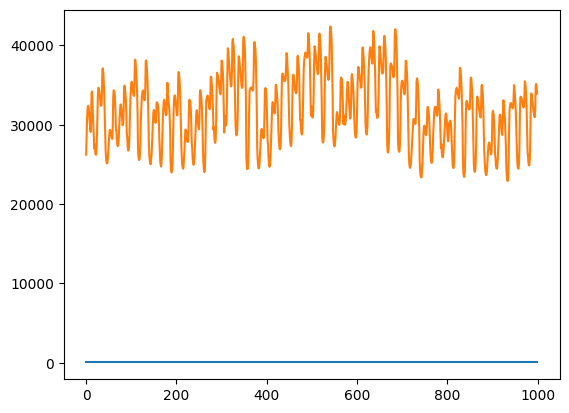

In [125]:
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])

In [128]:
test_predictions = model1.predict(X_test).flatten()

637/637 [==============================] - 2s 2ms/step


In [129]:
test_results = pd.DataFrame(data = {'Test Predictions': test_predictions, 'Actuals': y_test})
test_results.head()

,Test Predictions,Actuals
0,31.231951,30133.0
1,31.231951,30192.0
2,31.231951,30229.0
3,31.231951,30461.0
4,31.231951,30684.0


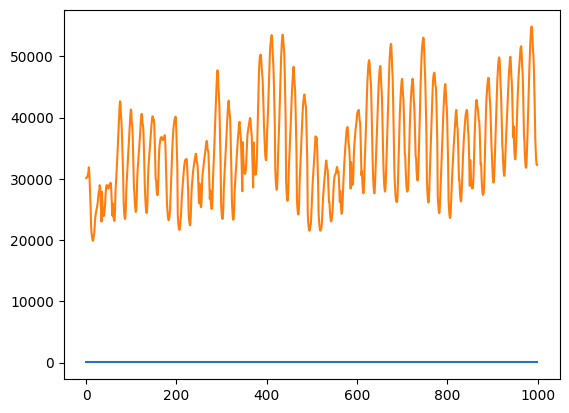

In [130]:
plt.plot(test_results['Test Predictions'][:1000])
plt.plot(test_results['Actuals'][:1000])